# Text-based Emotion Classifier

---

### Source of Dataset

> We will be using the [Emotions dataset for NLP](https://www.kaggle.com/praveengovi/emotions-dataset-for-nlp) by Praveen.

### Format of Dataset

> | text         | emotion |
> |--------------|---------|
> |i didnt feel humiliated | sadness |
> |i can go from feeling so hopeless to so damned hopeful just from being around... | sadness |
> |im grabbing a minute to post i feel greedy wrong | anger |
> |i am ever feeling nostalgic about the fireplace i will know that it is still... | love |
<br>

> **Note:** ***text*** and ***emotion*** are separated by a semi-colon ***';'***.
<br>
<pre>
i didnt feel humiliated;sadness
i am feeling grouchy;anger
...
</pre>

---

### Import Libraries & Dataset

We will start by importing the essential libraries.

> [Pandas](https://pandas.pydata.org/docs/) <br>
> [Numpy](https://numpy.org/doc/stable/) <br>
> [Seaborn](https://seaborn.pydata.org/tutorial.html) <br>
> [Matplotlib](https://matplotlib.org/3.5.1/)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

We will also import our train dataset `train.txt`.

In [2]:
train_data = pd.read_csv("datasets/train.txt", sep = ';')
train_data.head()

text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     16000 non-null  object
 1   emotion  16000 non-null  object
dtypes: object(2)
memory usage: 250.1+ KB


In [4]:
train_data.describe()

text emotion
count                                               16000   16000
unique                                              15969       6
top     i feel on the verge of tears from weariness i ...     joy
freq                                                    2    5362

Here are some observations from a quick glance through the dataset that was imported:
* There are a total of `16,000` data in the train dataset.
* There are a total of `6` different types of emotions in our train dataset.
* The `most common emotion` from the train dataset is `joy`.
* The emotion `joy` appeared `5362` times in our dataset.
* It appears that there exist multiple identical data in the train dataset as indicated by `count` > `unique`.
* We can also conclude that the identical data come in pairs as the top freq is `2`.

---

# Exploratory Data Analysis

### Pre-process Data Visualisation

We can visualise the data using a simple count plot.

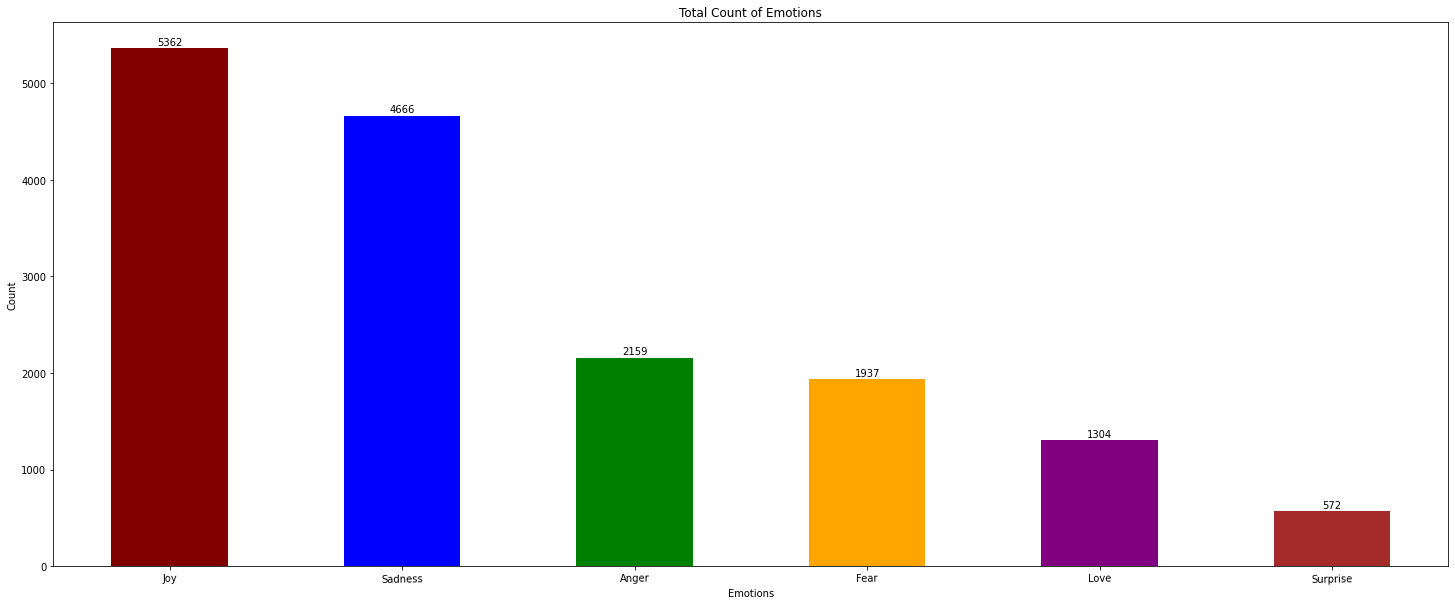

In [5]:
# Obtain the unique categories in the categorical variable emotion.
emotion = train_data["emotion"].value_counts()

# Plot configuration
plt.figure(figsize = (25, 10))
ax = emotion.plot(kind='bar', rot = 1, color=['maroon', 'blue', 'green', 'orange', 'purple', 'brown'])
ax.set_title("Total Count of Emotions", y = 1)
ax.set_xlabel('Emotions')
ax.set_ylabel('Count')
ax.set_xticklabels(('Joy', 'Sadness','Anger', 'Fear','Love', 'Surprise'))

for rect in ax.patches:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2
    space = 1
    label = "{:.0f}".format(y_value)
    ax.annotate(label, (x_value, y_value), xytext=(0, space), 
                textcoords = "offset points", ha = 'center', va = 'bottom')

# Visualise the plot
plt.show()

The simple plot above shows the `6` different emotions plotted in descending order of their frequency in the train dataset.

Let us dig a little deeper and check if there are any `suspicious texts` in our train dataset. We define suspicious texts as texts which contain `words which are extraordinary long`. This may indicate either a `typo` message, or a `spam` message. Either way, we ought to acknowledge the existence of these data before proceeding with cleaning our data.

In [6]:
avg_word_length = []
max_word_length = []

for sentence in train_data['text']:
    sentence_word_length = []
    count = 0
    for word in sentence.split():
        sentence_word_length.append(len(word))
        count += 1
    
    avg = 0
    max_length = 0
    for word_length in sentence_word_length:
        if word_length > max_length:
            max_length = word_length
        avg += word_length
    
    avg /= count
    avg_word_length.append(round(avg, 2))
    max_word_length.append(max_length)

print("The longest word in the train dataset has a character count of", max(max_word_length))


The longest word in the train dataset has a character count of 74


In the English language, the longest legitimate word has a character count of `45`. This implies that our train dataset contains illegitimate English words. We can perform further analysis to confirm this.

Text(0.5, 0, 'Average length of words in a data')

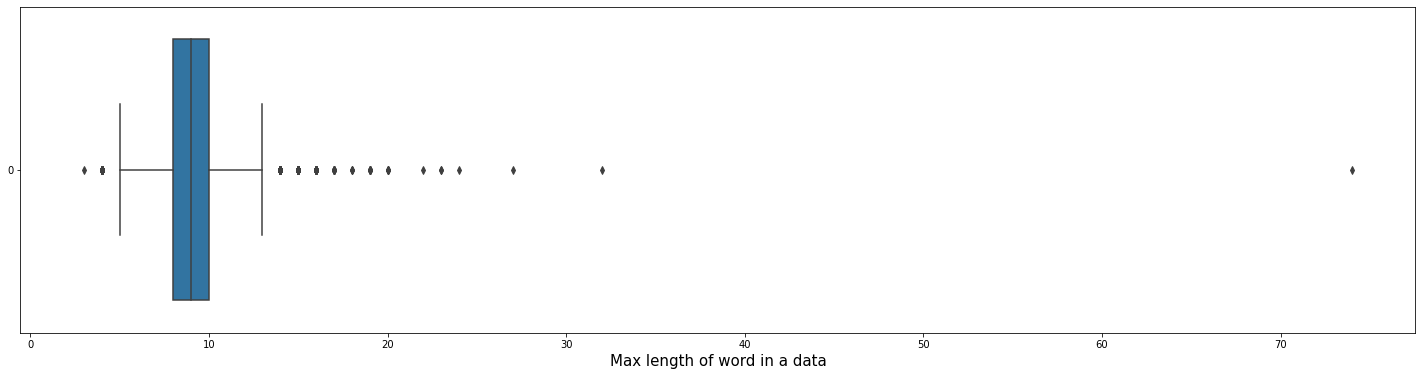

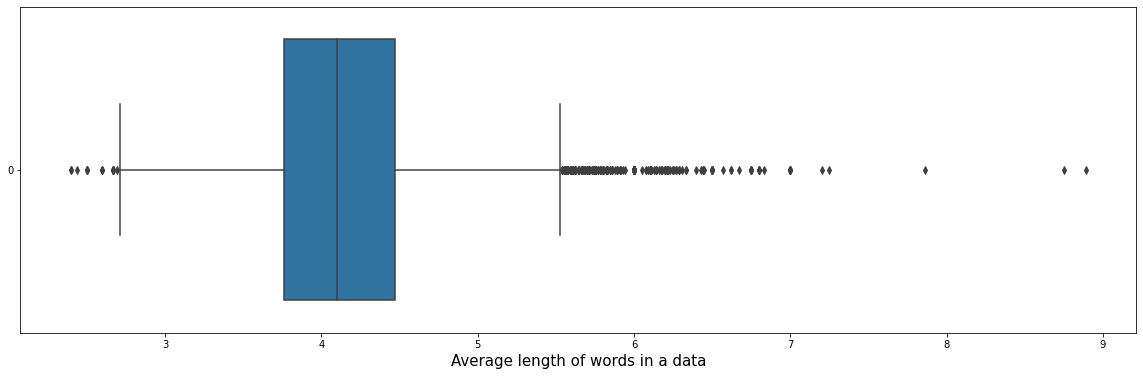

In [7]:
plt.figure(figsize = (25, 6))
sb.boxplot(data = max_word_length, orient = 'h')
plt.xlabel('Max length of word in a data', fontsize = 15)

plt.figure(figsize = (20, 6))
sb.boxplot(data = avg_word_length, orient = 'h')
plt.xlabel('Average length of words in a data', fontsize = 15)

We see the 74-characters long word appear in the first boxplot (as indicated by the outlier at the 70+ range). Since the other words are lesser than 45 characters long, we decided not to remove the outlier as the impact towards the effectiveness of our model later on is negligence.

We can also see that for most of our data, the average characters per word falls within the range of approximately 2 to 5.5, with some outliers having average characters per word up to 9. Nervtheless, we can deduce that we should be working on commonly used English words, judging by the average characters per word of our data alone.

Let us see if our hypothesis about working on commonly used English words is correct.

In [8]:
from wordcloud import WordCloud, STOPWORDS

def show_wordcloud(data, column, bg, max_words, max_font_size, scale, figsize):
    stopwords = set(STOPWORDS)
    text = " ".join(t for t in data[column])
    def display():
        wordcloud = WordCloud(
            background_color = bg,
            stopwords = stopwords,
            max_words = max_words,
            max_font_size = max_font_size,
            scale = scale,
            random_state = 1)
    
        wordcloud = wordcloud.generate(str(text))

        plt.figure(1, figsize = figsize)
        plt.axis('off')

        plt.imshow(wordcloud)
        plt.show()

    display()

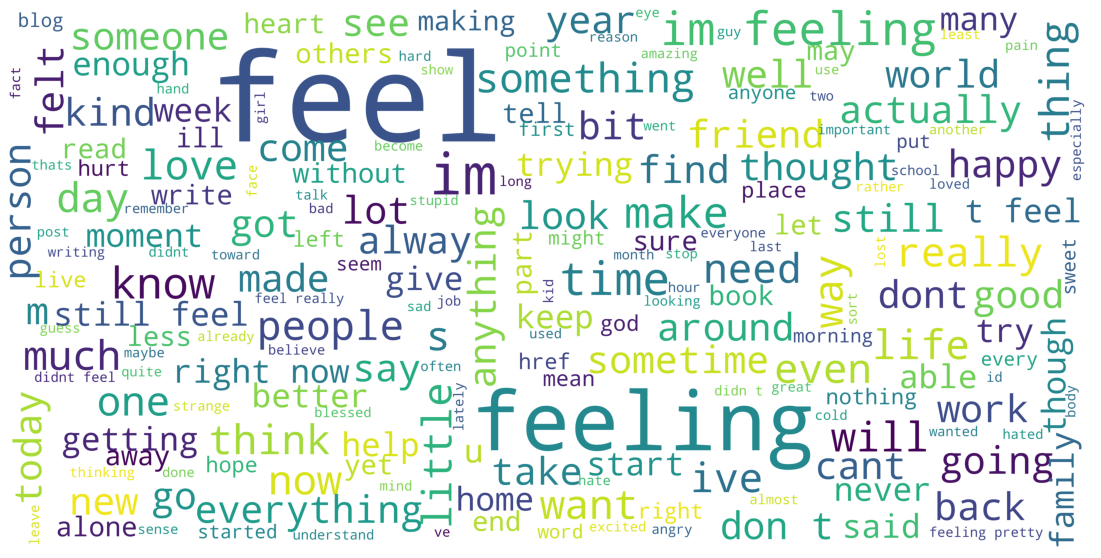

In [9]:
show_wordcloud(train_data, 'text', 'white', 200, 45, 30, (30, 10))

Indeed, from a quick glance at the word cloud alone, we can see words such as `feel`, `feeling`, `will`, `love`, etc. are commonly used in the train dataset. 

Here are some observations from the word cloud:
* We can see certain words such as `href` which is an html tag that appeared in the word cloud. This indicates we need to do some html tag removal during the cleaning phase of our dataset.
* There are words such as `dont` and `ive` which have no inherent emotion attached to them. We will need to remove these `stopwords` during the cleaning phase as well.
* There are also words which are different but carry the same meaning such as `feel` and `felt`. Thus we will have to perform `lemmatization` of words during the cleaning phase.

### Data Pre-processing: Investigate Duplicated Data

From the earlier observations, we note that there are a few data in the train dataset which are duplicated. This stems from the fact that certain words or even sentence can mean differently depending on the context and expression used when conveying the sentence.

However, since we are dealing with text-based data, expression becomes ambiguous especially when it comes to sentence/words with duality meanings. Thus, we opt to keep the duplicated data with different emotions and only remove the data that are identical and share the same emotion.

We first pinpoint the data which are identical.

In [10]:
duplicated = []
loc = 0
for sentence in train_data.duplicated(subset = ['text']):
    if sentence == True:
        duplicated.append(loc)
    loc += 1

dup1 = []
dup2 = []
text = []
for index in duplicated:
    for i in range(0, index - 1):
        if (train_data['text'].iloc[i] == train_data['text'].iloc[index]):
            dup1.append(train_data['emotion'].iloc[i])
            dup2.append(train_data['emotion'].iloc[index])
            text.append(train_data['text'].iloc[i])

dup_df = pd.DataFrame()
dup_df['text'] = text
dup_df['emotion 1'] = dup1
dup_df['emotion 2'] = dup2

dup_df.head(n = 31)

text emotion 1 emotion 2
0   i feel on the verge of tears from weariness i ...      love       joy
1               i still feel a craving for sweet food       joy      love
2   i tend to stop breathing when i m feeling stre...   sadness     anger
3   i was intensely conscious of how much cash i h...     anger   sadness
4   im still not sure why reilly feels the need to...      fear  surprise
5   i am not amazing or great at photography but i...       joy      love
6   ive also made it with both sugar measurements ...      love       joy
7   i had to choose the sleek and smoother feel of...      love       joy
8   i often find myself feeling assaulted by a mul...      fear   sadness
9        i feel im being generous with that statement      love       joy
10  i feel pretty tortured because i work a job an...     anger      fear
11                       i feel most passionate about      love       joy
12  i was so stubborn and that it took you getting...      love       joy
13  i write these words i feel sweet baby kicks fr...       joy      love
14  i feel a remembrance of the strange by justin ...  surprise      fear
15  i have chose for myself that makes me feel ama...  surprise       joy
16                   i still feel completely accepted       joy      love
17                           i feel so weird about it      fear  surprise
18  i cant escape the tears of sadness and just tr...      love       joy
19   i feel like a tortured artist when i talk to her      fear     anger
20  i feel more adventurous willing to take risks ...       joy       joy
21  i feel like i am very passionate about youtube...       joy      love
22                             i feel kind of strange      fear  surprise
23    i could feel myself hit this strange foggy wall      fear  surprise
24  i feel pretty weird blogging about deodorant b...  surprise      fear
25  i resorted to yesterday the post peak day of i...     anger      fear
26  i will feel as though i am accepted by as well...      love       joy
27  i shy away from songs that talk about how i fe...      love       joy
28  i bet taylor swift basks in the knowledge that...      fear     anger
29  i began to feel accepted by gaia on her own terms      love       joy
30  i was sitting in the corner stewing in my own ...   sadness     anger

From inspection we can already see that given a different context, the duplicated sentence having two different emotions make total sense. Thus, we will not be removing these datas for now, to see how our model performs when tested against the test dataset.

We will however, be removing data 20 as it has the same data and emotion shared by 2 data entries in the train dataset.

In [11]:
train_data = train_data.drop([duplicated[20]])

train_data.describe()

text emotion
count                                               15999   15999
unique                                              15969       6
top     i feel on the verge of tears from weariness i ...     joy
freq                                                    2    5361

### Data Pre-processing: Cleaning Train Dataset (Attemp 1)

Before we begin the cleaning phase, we will need to import the essential libraries. 
> [nltk](https://www.nltk.org) will be our de-facto dataset cleaning library.

In [12]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords

lm = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\juinl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\juinl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\juinl\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\juinl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Now we will perform the lemmatizing of words.

In [52]:
lemmatized_data = []

for sentence in train_data['text']:
    sentence = "".join([lm.lemmatize(w, 'v') for w in sentence])
    lemmatized_data.append(sentence)

train_data['clean_text'] = lemmatized_data 

Let us view the summary of our lemmatized words.

In [53]:
train_data['clean_text'].describe()

count                                                 15991
unique                                                15961
top       i cant escape the tears of sadness and just tr...
freq                                                      2
Name: clean_text, dtype: object

We can visualise the words used in the train dataset after lemmetization to see the changes.

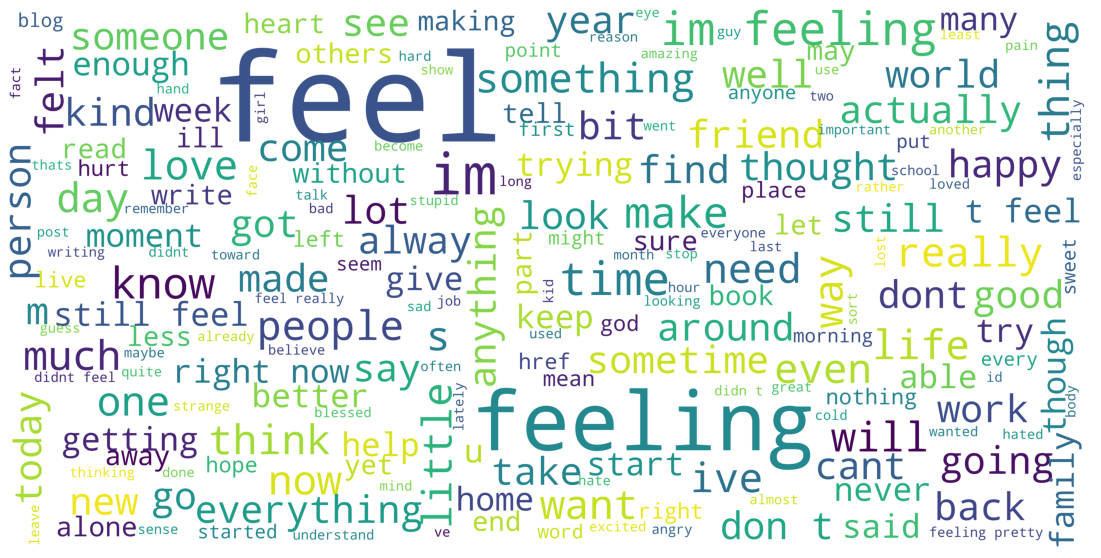

In [54]:
show_wordcloud(train_data, 'clean_text', 'white', 200, 45, 25, (30, 10))

Now that the words are lemmatized, we can proceed with removing all html tags and attributes in the dataset.

We will be creating a function to perform the removal of html tags and attributes.

In [55]:
def get_html_keys():
    url = "https://www.w3schools.com/TAgs/default.asp"
    html_keys = pd.read_html(url)
    html_tags = []
    html_keys[0].head()

    for i in html_keys[0]['Tag']:
        i = i.strip("<>")
        html_tags.append(i)
    
    html_tags.append("www")
    html_tags.append("http")
    html_tags.append("https")

    url = "https://www.w3schools.com/tags/ref_attributes.asp"
    html_keys = pd.read_html(url)
    html_attr = []
    html_keys[0].head()

    for i in html_keys[0]['Attribute']:
        html_attr.append(i)

    return html_tags + html_attr

def remove_html_attr(text, html_keys):
    text = text.split()
    return " ".join([t for t in text if t.lower() not in set(html_keys)])

Now we begin phase 2 of cleaning the dataset by removing all html tags and attributes.

In [56]:
# Retrieve all html tags and attribute
html_keys = get_html_keys()

html_removed = []

for sentence in train_data['clean_text']:
    # Remove any html tags and attribute that are in the sentence
    sentence = remove_html_attr(sentence, html_keys = html_keys)
    html_removed.append(sentence)

train_data['clean_text'] = html_removed

We can visualise the changes using word cloud once again.

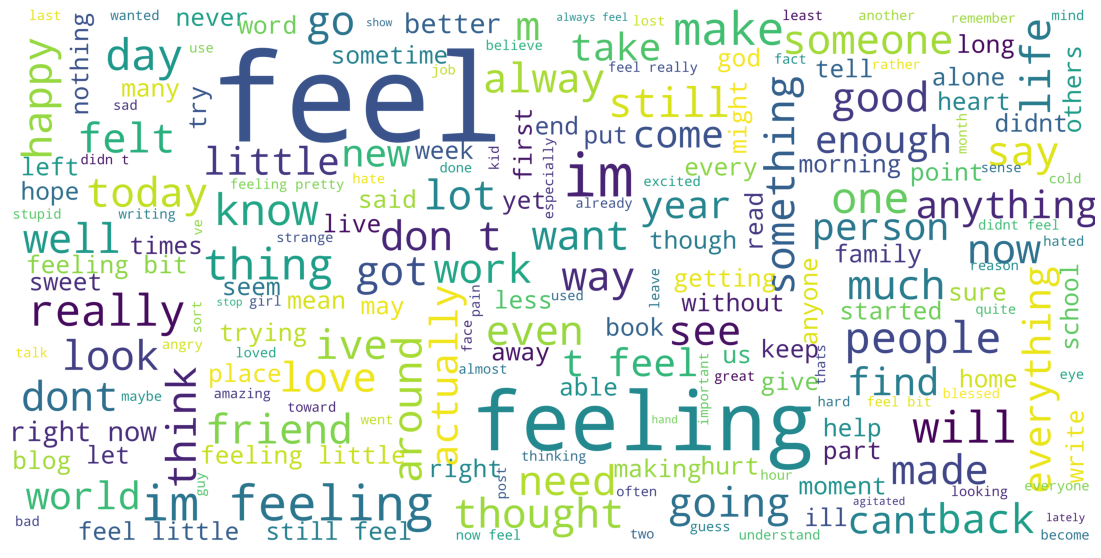

In [57]:
show_wordcloud(train_data, 'clean_text', 'white', 200, 45, 25, (30, 10))

We can clearly see that words such as `href` has been removed.

Next, we will be removing stopwords from our dataset. This will be the last cleaning phase.

Before we begin the last cleaning phase, we can see that some words such as `dont` have a missing apostrophe. However, nltk set of stopwords does not account for this special case. Thus, we will need to extend the word out.

In [58]:
def extend_word(word):
    custom_words = set(['dont', 'didnt', 'shouldnt', 'cant', 'wont', 'wouldnt', 'musnt'])

    temp = []
    if word in custom_words:
        for char in range(0, len(word) - 1):
            temp.append(word[char])
   
        return "".join(temp)
    
    return word

Now we can begin removing the stopwords.

In [59]:
# Custom stopwords which are not in the nltk stopwords set
custom_stopwords = set(['im', 'ive', 'ill', 'feeling', 'feel', 'felt'])

cleaned_data = []
outlier = []
forbidden_words = set(stopwords.words('English'))
loc = 0

for sentence in train_data['clean_text']:

    # Extend words that are concatenated without apostrophe such as 'cant' to 'can' and 't'
    # Remove the individual words which are present in the custom stopwords set and the nltk stopwords set
    split_sentence = sentence.split()
    temp = []
    for word in split_sentence:
        word = extend_word(word)
        if word not in custom_stopwords and word not in forbidden_words:
            temp.append(word)
    
    # Join back the words which are not removed into a sentence
    sentence = " ".join(temp)
    
    # Treat a sentence with only stopwords and html tags and attributes as outliers
    if len(sentence) == 0:
        outlier.append(loc)

    cleaned_data.append(sentence)
    loc += 1

train_data['clean_text'] = cleaned_data

# Remove the outliers from dataset
train_data = train_data.drop([train_data.index[loc] for loc in outlier])

We can visualise the data after stopwords removal using word cloud.

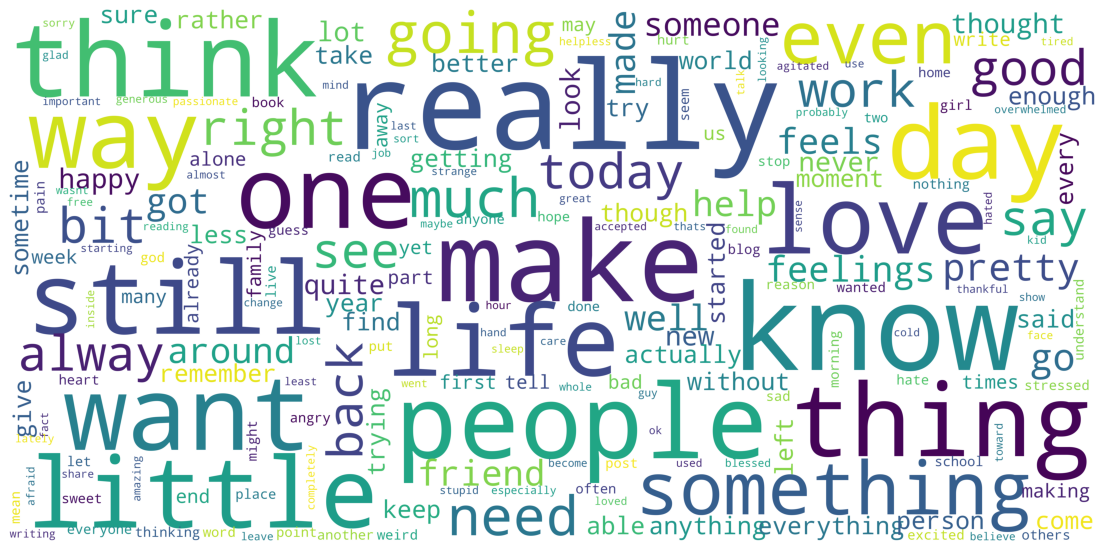

In [60]:
show_wordcloud(train_data, 'clean_text', 'white', 200, 45, 25, (30, 10))

Let us try to be more specific by showing word cloud of different emotions.

Anger


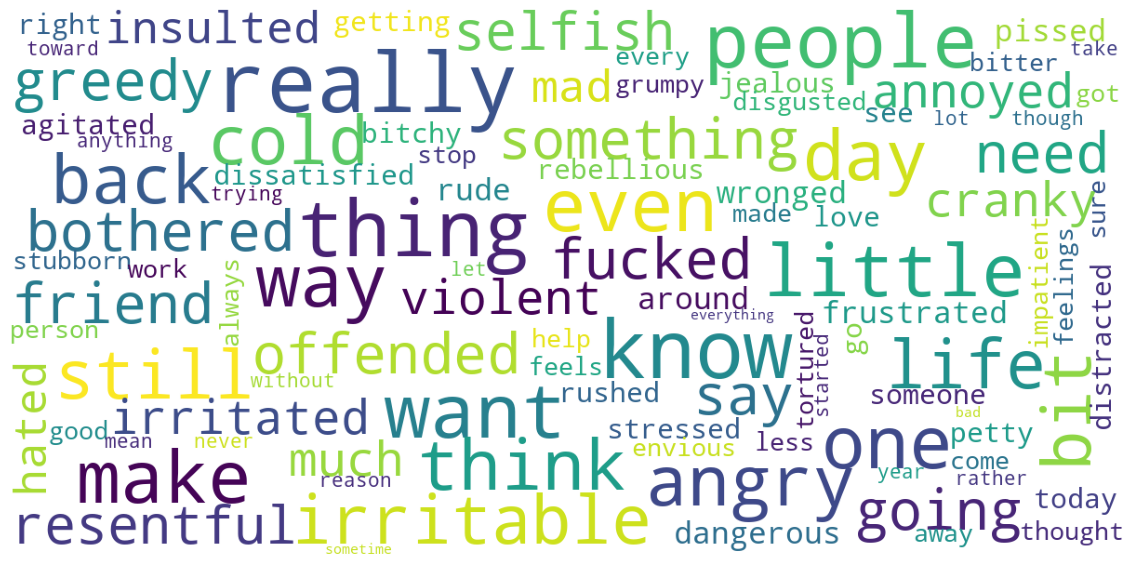

Fear


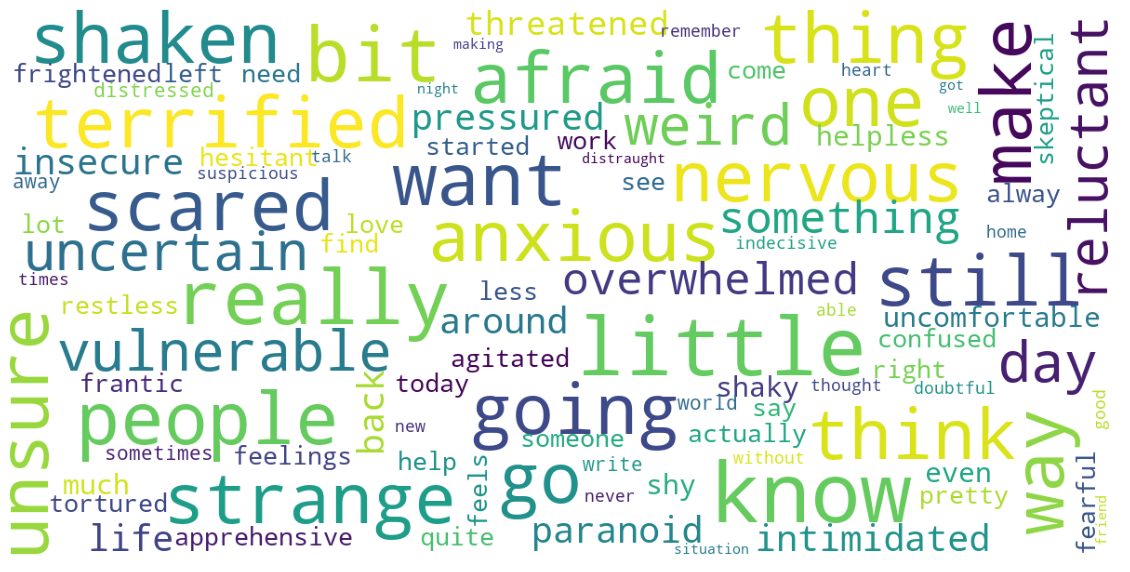

Joy


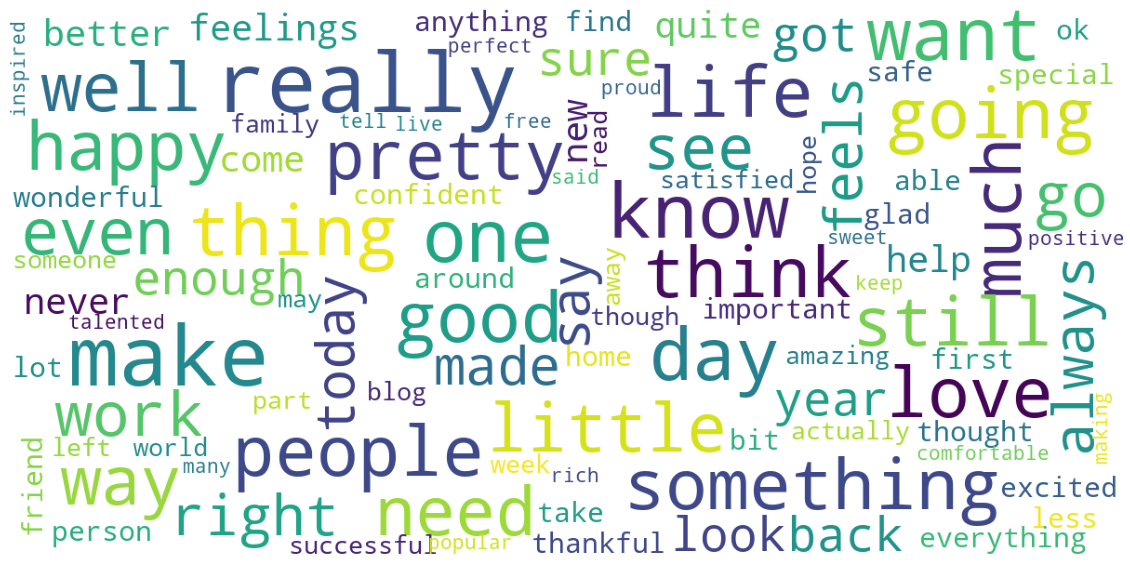

Love


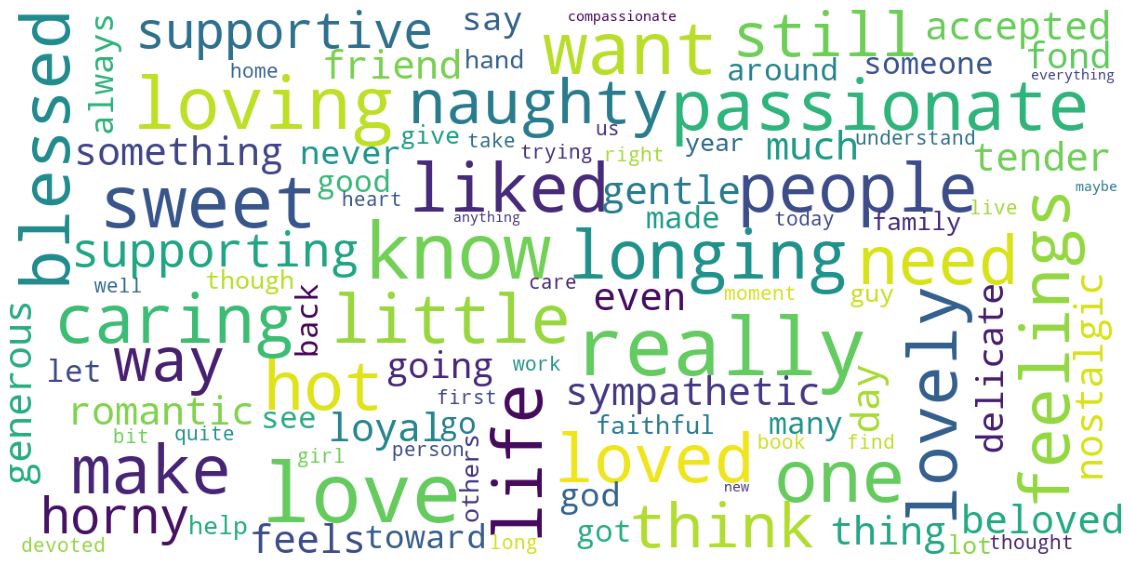

Sadness


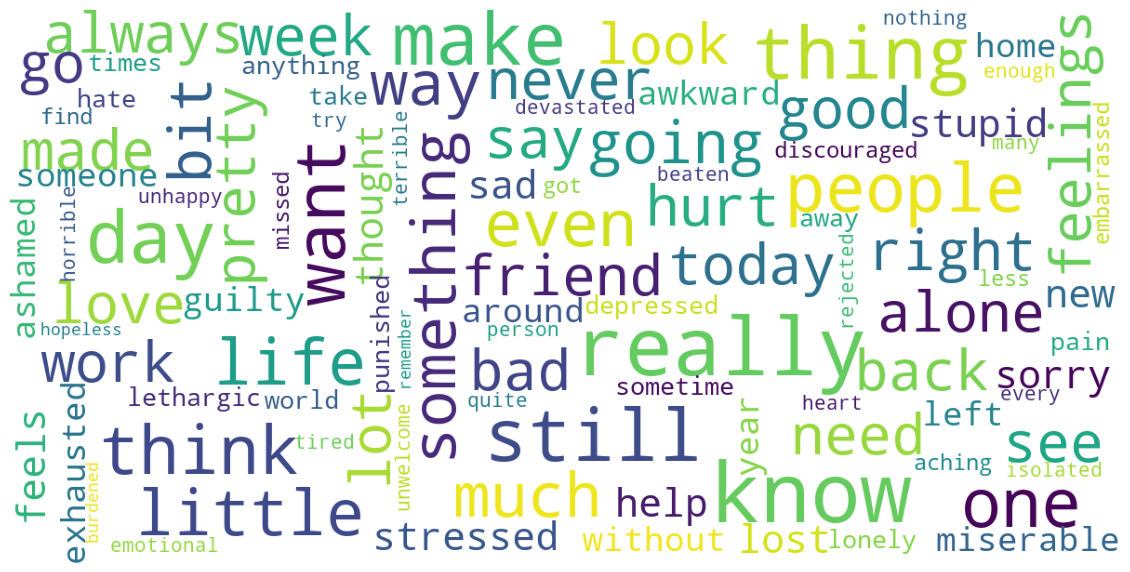

Surprise


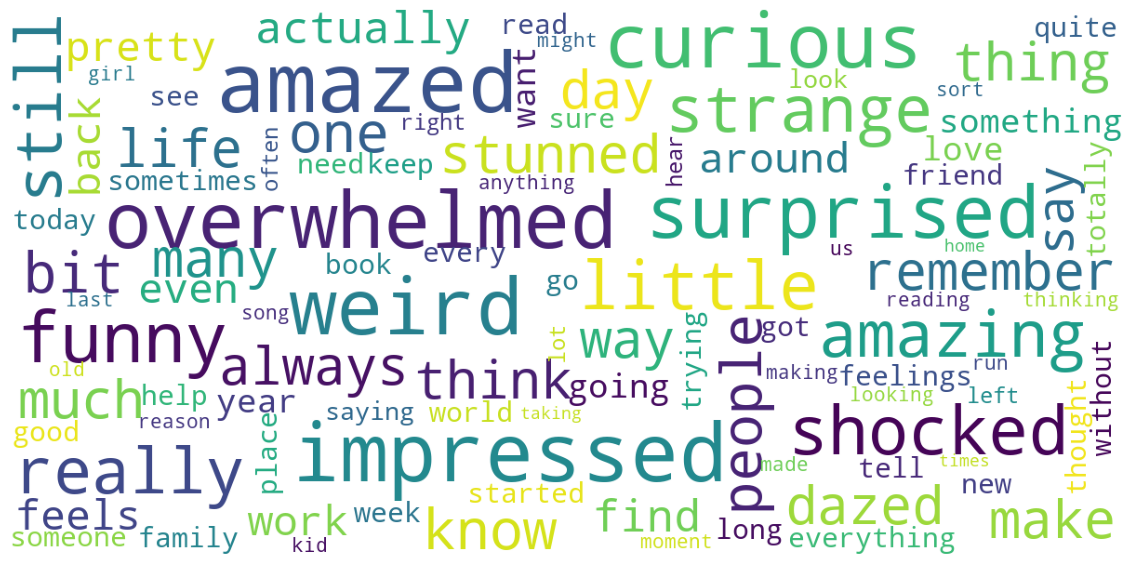

In [61]:
for i in pd.Categorical(train_data['emotion']).categories:
    df = train_data[train_data['emotion'] == i]
    print(str(i).capitalize())
    show_wordcloud(df, 'clean_text', 'white', 100, 30, 3, (20, 20))

---

# Machine Learning

We will be using `Logistic Regression` as our first choice of modelling.

In [69]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import pandas as pd
import numpy as np

We start by obtaining the features and labels.

In [63]:
# Features and labels
x_train = train_data['clean_text']
y_train = train_data['emotion']

We will then build the Logistic Regression pipeline.

In [64]:
# Logistic Regression Pipeline
pipe_lr = Pipeline(steps = [('cv', CountVectorizer()), ('lr', LogisticRegression())])

We will then fit the model using the train dataset.

In [65]:
pipe_lr.fit(x_train, y_train)

C:\Users\juinl\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

Then, we will check the accuracy of our `Logistic Regression` model prediction on the train dataset.

We will also check the classification accuracy, and the error rate of our model on the train dataset.

On the train dataset: 
Classification Accuracy: 0.9834907135263585

True Anger Rate:	 0.9827505827505828
False Anger Rate:	 0.017249417249417198

True Fear Rate:		 0.9752321981424149
False Fear Rate:	 0.024767801857585092

True Joy Rate:		 0.9856983655274889
False Joy Rate:		 0.014301634472511093

True Love Rate:		 0.980544747081712
False Love Rate:	 0.01945525291828798

True Sadness Rate:	 0.9871547848426461
False Sadness Rate:	 0.012845215157353929

True Surprise Rate:	 0.9700704225352113
False Surprise Rate:	 0.029929577464788748


<AxesSubplot:>

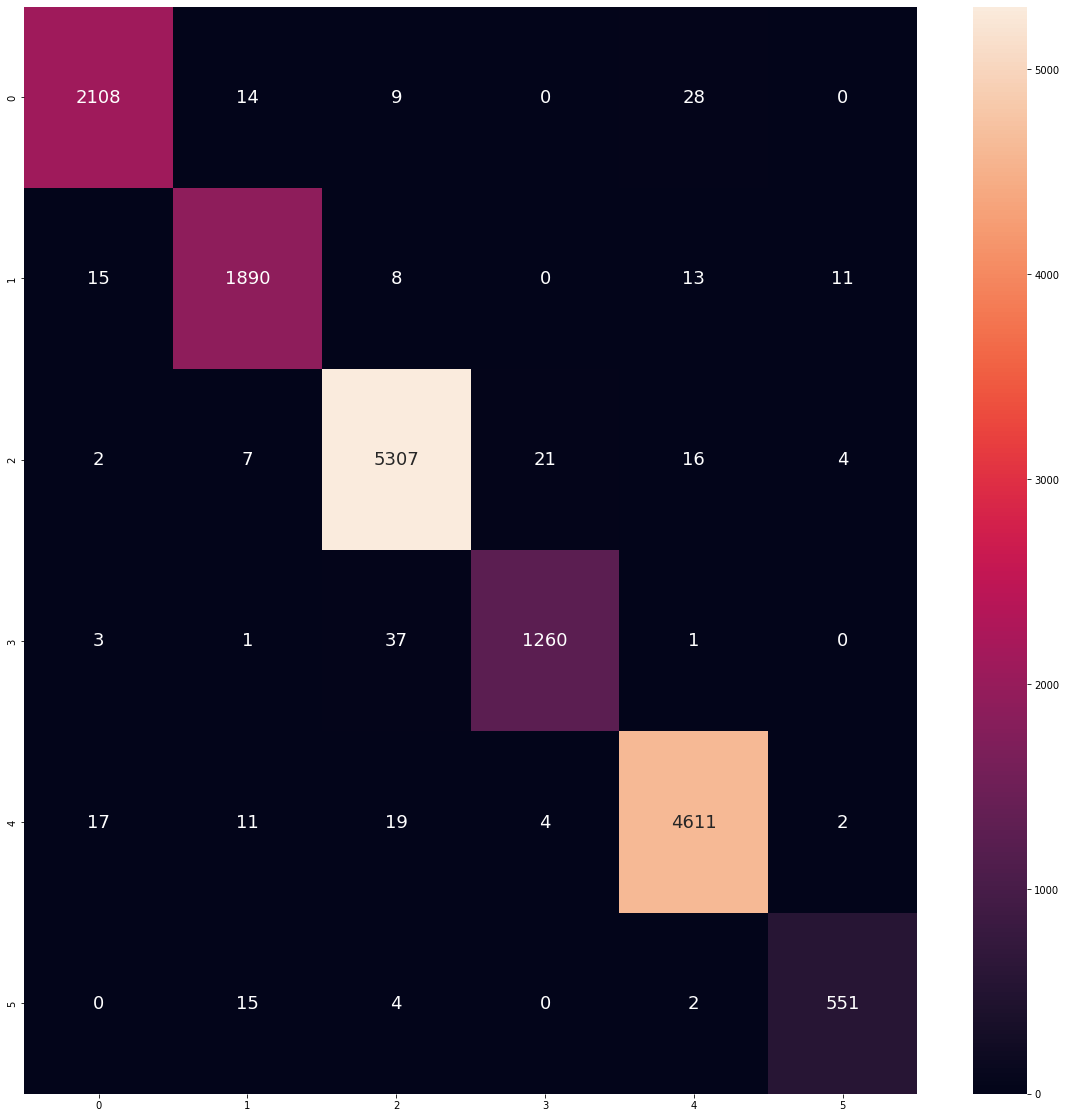

In [83]:
y_train_pred = pipe_lr.predict(x_train)

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)

print("On the train dataset: ")
print("Classification Accuracy:", pipe_lr.score(x_train, y_train))
print("")

T_Anger_Rate = cmTrain[0][0] / (cmTrain[0][0] + cmTrain[1][0] + cmTrain[2][0] + cmTrain[3][0] + cmTrain[4][0] + cmTrain[5][0])
F_Anger_Rate = 1 - T_Anger_Rate

T_Fear_Rate = cmTrain[1][1] / (cmTrain[0][1] + cmTrain[1][1] + cmTrain[2][1] + cmTrain[3][1] + cmTrain[4][1] + cmTrain[5][1])
F_Fear_Rate = 1 - T_Fear_Rate

T_Joy_Rate = cmTrain[2][2] / (cmTrain[0][2] + cmTrain[1][2] + cmTrain[2][2] + cmTrain[3][2] + cmTrain[4][2] + cmTrain[5][2])
F_Joy_Rate = 1 - T_Joy_Rate

T_Love_Rate = cmTrain[3][3] / (cmTrain[0][3] + cmTrain[1][3] + cmTrain[2][3] + cmTrain[3][3] + cmTrain[4][3] + cmTrain[5][3])
F_Love_Rate = 1 - T_Love_Rate

T_Sadness_Rate = cmTrain[4][4] / (cmTrain[0][4] + cmTrain[1][4] + cmTrain[2][4] + cmTrain[3][4] + cmTrain[4][4] + cmTrain[5][4])
F_Sadness_Rate = 1 - T_Sadness_Rate

T_Surprise_Rate = cmTrain[5][5] / (cmTrain[0][5] + cmTrain[1][5] + cmTrain[2][5] + cmTrain[3][5] + cmTrain[4][5] + cmTrain[5][5])
F_Surprise_Rate = 1 - T_Surprise_Rate

print("True Anger Rate:\t", T_Anger_Rate)
print("False Anger Rate:\t", F_Anger_Rate)
print("")
print("True Fear Rate:\t\t", T_Fear_Rate)
print("False Fear Rate:\t", F_Fear_Rate)
print("")
print("True Joy Rate:\t\t", T_Joy_Rate)
print("False Joy Rate:\t\t", F_Joy_Rate)
print("")
print("True Love Rate:\t\t", T_Love_Rate)
print("False Love Rate:\t", F_Love_Rate)
print("")
print("True Sadness Rate:\t", T_Sadness_Rate)
print("False Sadness Rate:\t", F_Sadness_Rate)
print("")
print("True Surprise Rate:\t", T_Surprise_Rate)
print("False Surprise Rate:\t", F_Surprise_Rate)

plt.figure(figsize = (20, 20))
sb.heatmap(cmTrain, annot = True, fmt=".0f", annot_kws={"size": 18})

Now, we will be testing our `Logistic Regression` model on the validation dataset to see how it performs.

First, we have to import the validation dataset.

In [84]:
val_data = pd.read_csv("datasets/val.txt", sep = ';')

x_val = val_data['text']
y_val = val_data['emotion']

We will also check the classification accuracy, and the error rate of our model on the validation dataset.

On the Validation dataset: 
Classification Accuracy: 0.8985

True Anger Rate:	 0.914179104477612
False Anger Rate:	 0.08582089552238803

True Fear Rate:		 0.8620689655172413
False Fear Rate:	 0.13793103448275867

True Joy Rate:		 0.9107391910739191
False Joy Rate:		 0.0892608089260809

True Love Rate:		 0.8448275862068966
False Love Rate:	 0.15517241379310343

True Sadness Rate:	 0.9180035650623886
False Sadness Rate:	 0.08199643493761144

True Surprise Rate:	 0.8051948051948052
False Surprise Rate:	 0.19480519480519476


<AxesSubplot:>

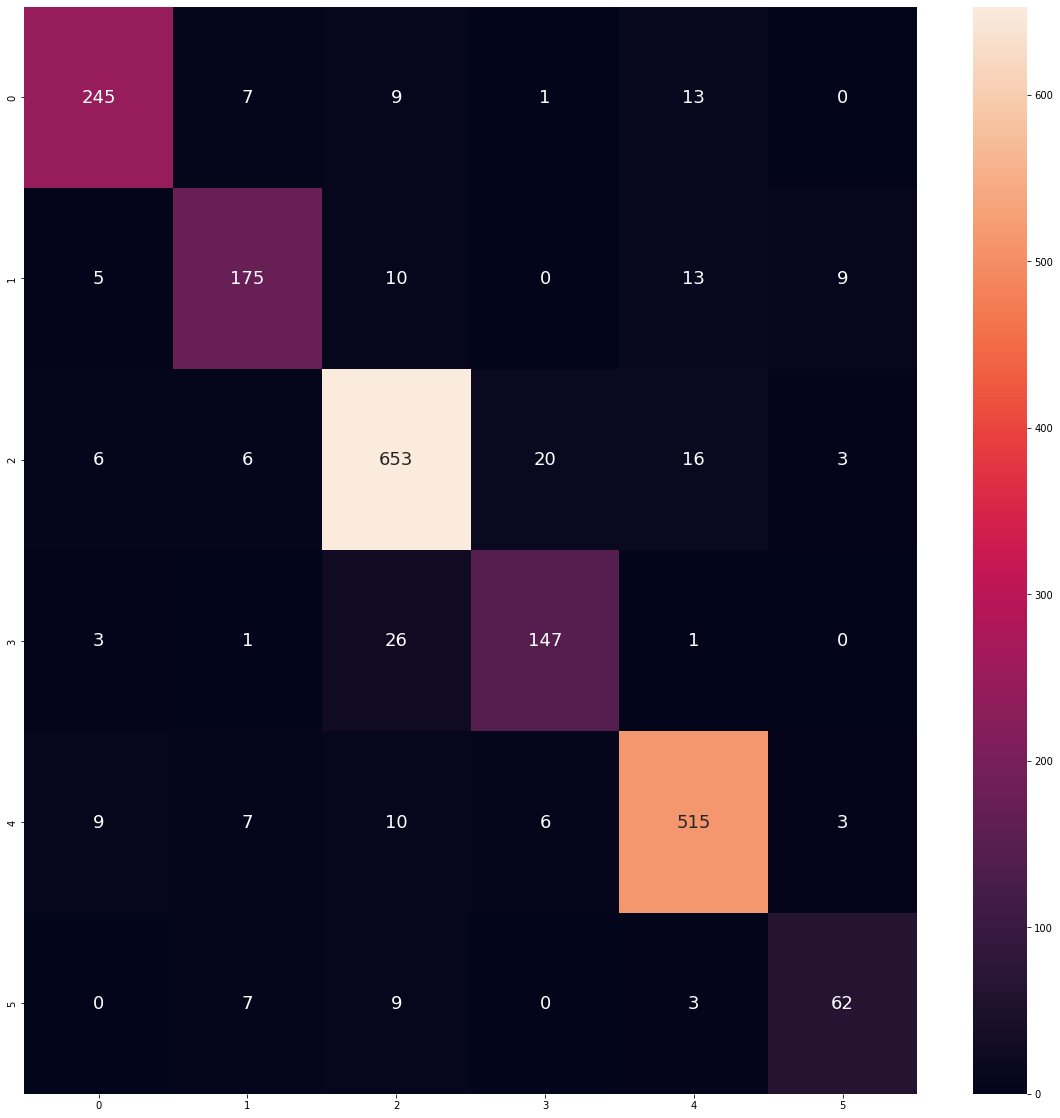

In [86]:
y_val_pred = pipe_lr.predict(x_val)

# Print the Accuracy Measures from the Confusion Matrix
cmVal = confusion_matrix(y_val, y_val_pred)

print("On the Validation dataset: ")
print("Classification Accuracy:", pipe_lr.score(x_val, y_val))
print("")

T_Anger_Rate = cmVal[0][0] / (cmVal[0][0] + cmVal[1][0] + cmVal[2][0] + cmVal[3][0] + cmVal[4][0] + cmVal[5][0])
F_Anger_Rate = 1 - T_Anger_Rate

T_Fear_Rate = cmVal[1][1] / (cmVal[0][1] + cmVal[1][1] + cmVal[2][1] + cmVal[3][1] + cmVal[4][1] + cmVal[5][1])
F_Fear_Rate = 1 - T_Fear_Rate

T_Joy_Rate = cmVal[2][2] / (cmVal[0][2] + cmVal[1][2] + cmVal[2][2] + cmVal[3][2] + cmVal[4][2] + cmVal[5][2])
F_Joy_Rate = 1 - T_Joy_Rate

T_Love_Rate = cmVal[3][3] / (cmVal[0][3] + cmVal[1][3] + cmVal[2][3] + cmVal[3][3] + cmVal[4][3] + cmVal[5][3])
F_Love_Rate = 1 - T_Love_Rate

T_Sadness_Rate = cmVal[4][4] / (cmVal[0][4] + cmVal[1][4] + cmVal[2][4] + cmVal[3][4] + cmVal[4][4] + cmVal[5][4])
F_Sadness_Rate = 1 - T_Sadness_Rate

T_Surprise_Rate = cmVal[5][5] / (cmVal[0][5] + cmVal[1][5] + cmVal[2][5] + cmVal[3][5] + cmVal[4][5] + cmVal[5][5])
F_Surprise_Rate = 1 - T_Surprise_Rate

print("True Anger Rate:\t", T_Anger_Rate)
print("False Anger Rate:\t", F_Anger_Rate)
print("")
print("True Fear Rate:\t\t", T_Fear_Rate)
print("False Fear Rate:\t", F_Fear_Rate)
print("")
print("True Joy Rate:\t\t", T_Joy_Rate)
print("False Joy Rate:\t\t", F_Joy_Rate)
print("")
print("True Love Rate:\t\t", T_Love_Rate)
print("False Love Rate:\t", F_Love_Rate)
print("")
print("True Sadness Rate:\t", T_Sadness_Rate)
print("False Sadness Rate:\t", F_Sadness_Rate)
print("")
print("True Surprise Rate:\t", T_Surprise_Rate)
print("False Surprise Rate:\t", F_Surprise_Rate)

plt.figure(figsize = (20, 20))
sb.heatmap(cmVal, annot = True, fmt=".0f", annot_kws={"size": 18})

From both the validation and train dataset, we can see that our initial `Logistic Regression` model is doing a very good job at predicting the correct emotion as the classification accuracy is high in both train and validation datasets. 

Furthermore, the False Rates of all emotions are very low (as indicated by the dark colours on the confusion matrix on non-diagonal entries) and the True Rates of all emotions are very high. Thus, our initial choice of using `Logistic Regression` model is quite appropriate.

In [68]:
from sklearn.naive_bayes import MultinomialNB

pip_nb = Pipeline(steps=[("count_verctorizer", CountVectorizer()),("naive_bayes", MultinomialNB())])


pip_nb.fit(x_train, y_train)

pip_nb.score(x_val, y_val)

0.799